In [4]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [5]:
df = pd.read_csv('../data/train_qso.csv')

In [6]:
data = df[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2','class_bin']]

In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [8]:
clean_dataset(data)

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ug,ur,ui,uz,uj,uk,uw1,uw2,gr,gi,...,zj,zk,zw1,zw2,jw1,jw2,kw1,kw2,w1w2,class_bin
0,0.9914,2.6709,3.936,4.606,4.640063,5.577868,6.331862,6.792161,1.6795,2.9446,...,0.034063,0.971868,1.725862,2.186161,1.691799,2.152098,0.753994,1.214293,0.460299,0.0
1,1.6696,2.7998,3.946,4.653,4.774833,5.712456,6.839255,7.140017,1.1302,2.2764,...,0.121833,1.059456,2.186255,2.487017,2.064422,2.365184,1.126799,1.427561,0.300762,1.0
2,-0.0636,1.4667,2.528,2.951,3.489250,4.446374,3.788207,3.747212,1.5303,2.5916,...,0.538250,1.495374,0.837207,0.796212,0.298957,0.257962,-0.658167,-0.699162,-0.040995,0.0
3,0.1251,1.7899,2.512,2.802,3.657627,4.726333,4.291627,4.354540,1.6648,2.3869,...,0.855627,1.924333,1.489627,1.552540,0.634000,0.696913,-0.434706,-0.371793,0.062913,0.0
4,0.0428,1.4691,2.165,2.487,3.120206,4.259295,4.177098,4.230727,1.4263,2.1222,...,0.633206,1.772295,1.690098,1.743727,1.056892,1.110521,-0.082197,-0.028568,0.053629,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1.6430,2.9450,3.463,4.035,5.497000,7.778000,9.640000,10.702000,1.3020,1.8200,...,1.462000,3.743000,5.605000,6.667000,4.143000,5.205000,1.862000,2.924000,1.062000,1.0
220,0.8740,1.8690,2.274,2.861,4.048000,5.926000,7.477000,8.375000,0.9950,1.4000,...,1.187000,3.065000,4.616000,5.514000,3.429000,4.327000,1.551000,2.449000,0.898000,1.0
221,1.0170,1.9930,2.127,2.776,4.071000,6.322000,7.949000,9.162000,0.9760,1.1100,...,1.295000,3.546000,5.173000,6.386000,3.878000,5.091000,1.627000,2.840000,1.213000,1.0
222,1.7170,3.1220,3.678,4.289,5.478000,7.913000,9.298000,10.443000,1.4050,1.9610,...,1.189000,3.624000,5.009000,6.154000,3.820000,4.965000,1.385000,2.530000,1.145000,1.0


In [9]:
np.any(np.isnan(data))

False

In [10]:
data.to_csv('../data/train_qso_final.csv')

## Train Test Split

In [11]:
X = data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2']]

y = data['class_bin']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [13]:
from sklearn.dummy import DummyRegressor

base_line_model = DummyRegressor(strategy = 'mean').fit(X,y)

base_line_model.score(X,y)

0.0

## Model(basic)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [15]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7045454545454546


In [16]:
#generate a no skill prediction
ns_prob = [0 for _ in range(len(y_test))]
#prodict probability
clf_prob = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only/
clf_prob = clf_prob[:, 1]

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, ns_prob)
lr_auc = roc_auc_score(y_test, clf_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.760


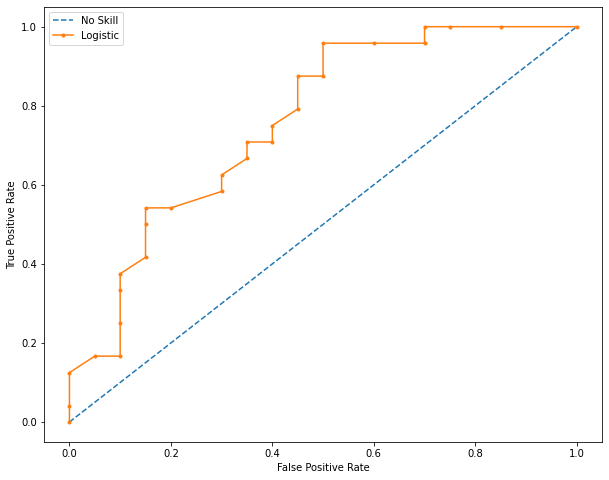

In [18]:
import matplotlib.pyplot as plt
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_prob)


plt.figure(figsize=(10, 8))
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.savefig('../figures/rfc_v1_rocauc.png')
# show the plot
plt.show()



In [19]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

w1w2    0.065872
ij      0.050767
zw2     0.045895
rw1     0.042362
rw2     0.041030
gi      0.038804
zw1     0.038548
jw1     0.037877
zj      0.036880
uj      0.034298
iw2     0.032379
ui      0.031742
gz      0.031552
jw2     0.030957
uw1     0.028638
kw2     0.028197
uk      0.027758
uz      0.027662
ug      0.027575
gw1     0.027488
kw1     0.027330
iz      0.026334
gr      0.025793
ri      0.025634
ik      0.025080
rz      0.025020
iw1     0.023302
ur      0.022991
zk      0.021433
gw2     0.017870
uw2     0.017182
gk      0.015749
dtype: float64

No handles with labels found to put in legend.


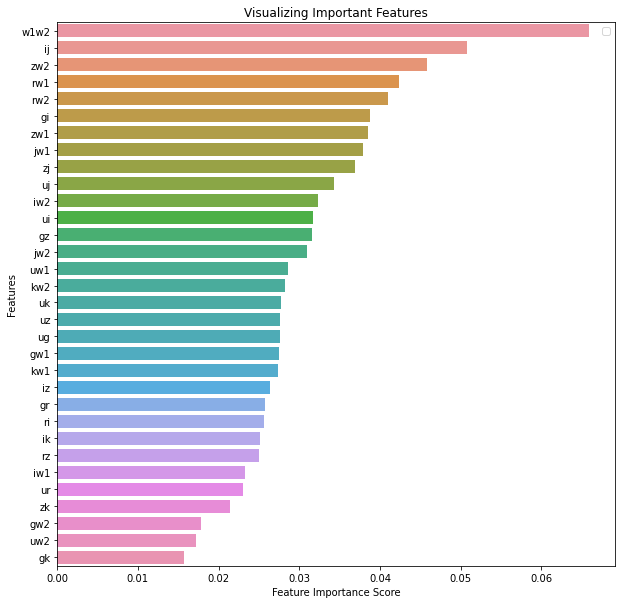

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig('../figures/rfc_v1_features.png')
plt.show()

